# Introduction

## 1. Domain-specific area

Housing is a trending topic in Singapore today. Build-To-Order HDB flats are being erected everywhere in Singapore to accomodate the rising population. They are a relatively new scheme and are in high demand hence, there are long waiting periods for the completion of the BTOs and the prices for them are sky-high. As a result, many young couples searching for houses to settle in turn their attention to resale flats. As such I am keen in finding out the factors resulting in the prices for the resale flats and predict prices of resale flats with the given factors which would be able to help these people find their ideal homes.

## 2. Dataset

The dataset which I will be using is a dataset of resale flats provided by the Singapore government which can be found at https://data.gov.sg/dataset/resale-flat-prices. Since the data is provided by the government, it is clean, accurate and reliable. However, the dataset contains about 140,000 data. 

The dataset has the Singapore open data licence. This information is found on the documentation of the dataset on the website. This means that I am able to use, access, download, modify and adapt the datasets for this project.

The dataset contains these specific fields
- Month: The month and year when the data was added into the dataset
- Town: The town which the flat is located
- Flat type: The type of flat for example, 3 room flat 
- Block: Block number of the flat
- Street name: Name of street where the flat is located
- Storey range: Storey range of the flat which it is situated in
- Floor area: The floor area of the flat
- Flat model: The model of the flat
- Lease commence date: The year which the lease of the flat started
- Remaining lease: The remaining years and months for the lease of the flat
- Resale price: The resale price of the flat

## 3. Objectives

The objective of this project is to conduct exploratory data analysis and uncover the factors influencing the pricing of a resale flat.

# Implementation

## 4. Preprocessing

In [1]:
#import relevant libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Loading data into dataframe
resaleFlats = pd.read_csv('resale_flats.csv')
print("Full dataset size: ", resaleFlats.shape)

Full dataset size:  (141996, 11)


In [2]:
resaleFlats.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [3]:
resaleFlats['month'].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-02', '2022-11', '2022-01', '2022-05', '2022-07', '2022-08',
       '2022-09', '2022-10', '2022-04', '2022-12', '2022-03', '2022-06'],
      dtype=object)

In [4]:
# Check for missing values
resaleFlats.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [5]:
# data types
resaleFlats.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

## 5. Exploratory Data Analysis

### Exploration 1: View the mean resale price of each town

<AxesSubplot:xlabel='resale_price', ylabel='town'>

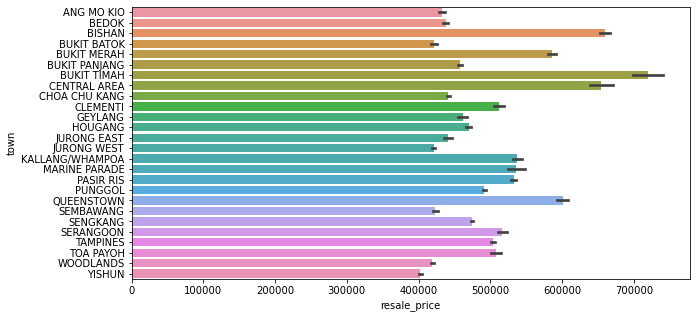

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data = resaleFlats, x='resale_price',y='town',estimator = np.mean, ax = ax)

From the barchart above, we can see that Bukit Timah, Central Area and Bishan has the highest mean resale flats prices while town such as Jurong West, Jurong East and Yishun have the lowest mean resale prices.

### Exploration 2: View the trend of the size of flats throughout the years


<AxesSubplot:xlabel='lease_commence_date', ylabel='floor_area_sqm'>

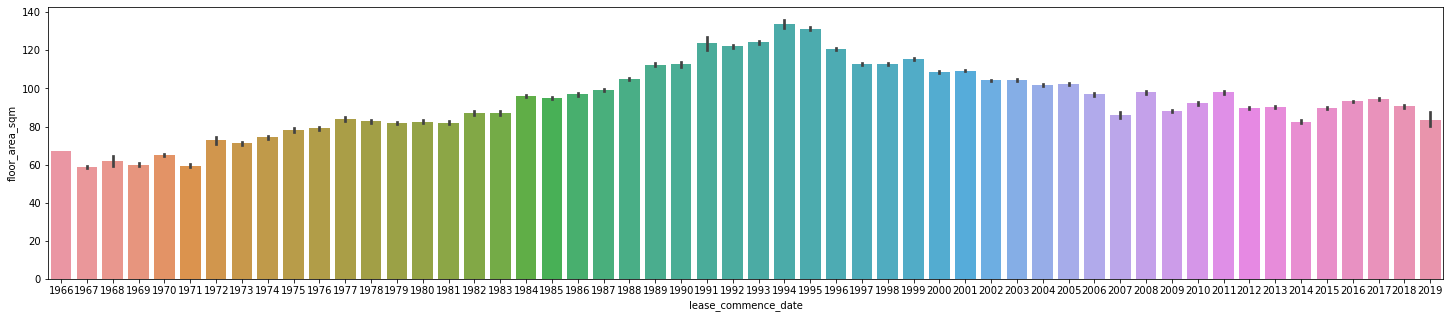

In [7]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.barplot(data = resaleFlats, x='lease_commence_date',y='floor_area_sqm',estimator = np.mean, ax = ax)

The floor area of the resale flats from the 1960s to the mid 1990s steadily increased whereby from 1995 to 2019 saw the steady decline in the floor area of the resale flat.

### Exploration 3: The older the flat, the lower the resale price


<AxesSubplot:xlabel='lease_commence_date', ylabel='resale_price'>

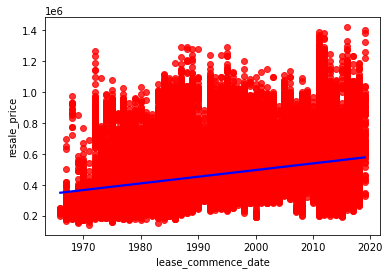

In [8]:
sns.regplot(x='lease_commence_date', y='resale_price', data=resaleFlats,
           scatter_kws={"color": "red"}, line_kws={"color": "blue"})

It seems to be true that the older the flat is, the lower the resale price.

### Heatmap to view the correlation between every features

<AxesSubplot:>

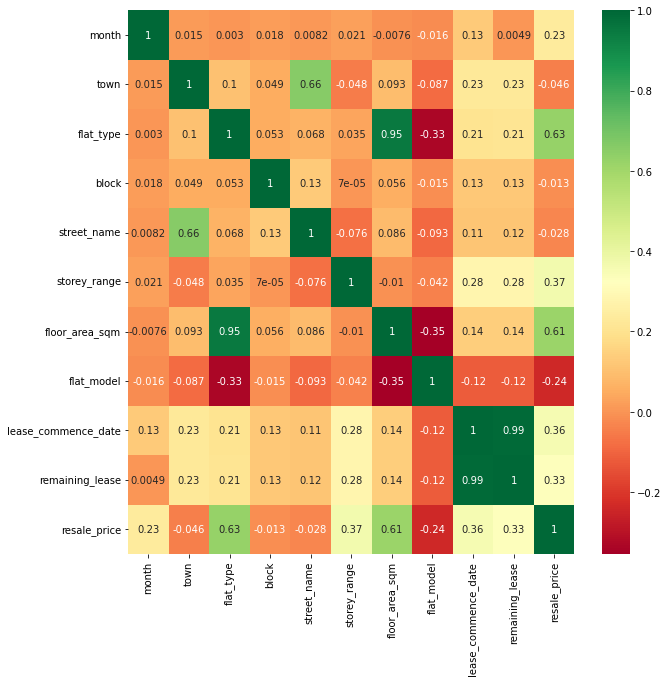

In [9]:
# convert the datatypes of the dataset to make it useable for heatmap
resaleFlatsNew = resaleFlats.copy()
for col_name in resaleFlatsNew.columns:
    if(resaleFlatsNew[col_name].dtype == 'object'):
        resaleFlatsNew[col_name] = resaleFlatsNew[col_name].astype('category')
        resaleFlatsNew[col_name] = resaleFlatsNew[col_name].cat.codes

plt.figure(figsize=(10,10))
sns.heatmap(resaleFlatsNew.corr(),annot=True,cmap="RdYlGn")

## 6. Building a machine learning model

The reason why Random Forest was chosen is because the model has a high accuracy which means it produces good predictions which can be used for regression. It also efficiently handles large datasets. Since the dataset that I am using contains a huge amount of data and I am using it for predicition of resale prices, a continuous value based on multiple features, Random Forest Regressor is a suitable model for this dataset.

In [10]:
features = resaleFlatsNew.drop(['resale_price'],axis=1)
label = resaleFlatsNew['resale_price']

#split training and test
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.20, random_state = 0)

#rf model
from sklearn.ensemble import RandomForestRegressor
# model
randomForest = RandomForestRegressor(n_estimators=50, random_state=0)
# train the model on training data
randomForest.fit(X_train,y_train)
#get prediction of test data
prediction=randomForest.predict(X_test)
#print(X_train)
#print(X_test)
print("Prediction(Sample of first 10): \n",prediction[:10])
print("Actual(Sample of first 10): \n", y_test[:10])

Prediction(Sample of first 10): 
 [422397.76       509590.29333333 299688.33333333 751359.52
 414530.88       583215.52       294120.         291891.04
 595506.56       629451.36      ]
Actual(Sample of first 10): 
 50096     370000.0
122943    515000.0
94529     292000.0
81103     739000.0
65603     400000.0
62557     565000.0
22016     275000.0
17057     310000.0
107711    605000.0
13171     638000.0
Name: resale_price, dtype: float64


In [11]:
# RF calculate error
RandomForestrmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: ",RandomForestrmse)
# get the model score
RandomForestmodelScore=randomForest.score(X_test,y_test)
print("Model score: ",RandomForestmodelScore)


RMSE:  29621.062867329976
Model score:  0.9676387975148589


Find features with highest scores which contribute to the accuracy of the prediction

In [12]:
# find feature scores
feature_score = feature_scores = pd.Series(randomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

floor_area_sqm         0.413223
storey_range           0.118782
town                   0.117284
lease_commence_date    0.085787
month                  0.069357
street_name            0.054262
block                  0.040446
flat_type              0.039148
flat_model             0.038467
remaining_lease        0.023243
dtype: float64

Remove features that do not contribute much to the accuracy of the prediction to improve the model

In [15]:
## build model using high scoring features
#sel_feat = ["floor_area_sqm","storey_range","town"]
features2 = resaleFlatsNew.drop(['remaining_lease','flat_model'],axis=1)
label2 = resaleFlatsNew['resale_price']

#split training and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, label2, test_size = 0.20, random_state = 0)

#rf model
from sklearn.ensemble import RandomForestRegressor
# model
randomForest2 = RandomForestRegressor(n_estimators=50, random_state=0)
# train the model on training data
randomForest2.fit(X_train2,y_train2)
#get prediction of test data
prediction2=randomForest2.predict(X_test2)
#print(X_train)
#print(X_test)
print("Prediction(Sample of first 10): \n",prediction2[:10])
print("Actual(Sample of first 10): \n", y_test2[:10])

# RF calculate error
RandomForestrmse2 = np.sqrt(mean_squared_error(y_test2, prediction2))
print("RMSE: ",RandomForestrmse2)
# get the model score
RandomForestmodelScore2 = randomForest2.score(X_test2,y_test2)
print("Model score: ",RandomForestmodelScore2)


Prediction(Sample of first 10): 
 [370000.         515000.         292000.         739000.
 399999.99999392 565000.         275000.         310000.
 605000.         638000.        ]
Actual(Sample of first 10): 
 50096     370000.0
122943    515000.0
94529     292000.0
81103     739000.0
65603     400000.0
62557     565000.0
22016     275000.0
17057     310000.0
107711    605000.0
13171     638000.0
Name: resale_price, dtype: float64
RMSE:  91.43027052501384
Model score:  0.9999996916788021



The model has a high model score of 0.9999996916788021 close to 1. This means that the model is quite accurate and will perform well when predicting on unseen data and that this model is suitable for predicting the prices of the resale flats.

